In [1]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df1= pd.read_excel("Timeseries_new.xlsx")


In [3]:
df1

,Arrival,Room_Rate
0,2019-12-31,4023.61
1,2019-12-31,4000.00
2,2019-12-31,4588.42
3,2019-12-30,5299.00
4,2019-12-30,5589.00
...,...,...
91246,2017-12-09,3582.74
91247,2017-12-04,5250.00
91248,2017-12-01,4404.15
91249,2017-10-31,3637.86


In [4]:
df1.isnull().sum()

Arrival      0
Room_Rate    0
dtype: int64

In [5]:
df1=df1.rename(columns={"Arrival": "Date", "Room_Rate": "Total"})

In [6]:
df=df1.groupby(['Date']).sum()

In [7]:
# df=df1.drop_duplicates(keep = False)

In [8]:
df

,Total
Date,
2017-07-01,4822.92
2017-10-31,3637.86
2017-12-01,4404.15
2017-12-04,5250.00
2017-12-09,3582.74
...,...
2019-12-27,706916.01
2019-12-28,787527.73
2019-12-29,428261.99


In [9]:
# Creating a new DF

dfn = pd.DataFrame(columns = ['Date', 'Total'])

In [10]:
dfn.head()

,Date,Total


In [11]:
# Giving manual values of Date column from 1/1/18 to 31/12/19

dfn['Date'] = pd.date_range(start='1/1/2018', end = "31/12/2019", freq='D')

In [12]:
dfn.head()

,Date,Total
0,2018-01-01,NaN
1,2018-01-02,NaN
2,2018-01-03,NaN
3,2018-01-04,NaN
4,2018-01-05,NaN


In [13]:
lj_df = pd.merge(dfn, 
                     df, 
                     on ='Date', 
                     how ='left')

In [14]:
lj_df

,Date,Total_x,Total_y
0,2018-01-01,NaN,412580.54
1,2018-01-02,NaN,509174.25
2,2018-01-03,NaN,679743.46
3,2018-01-04,NaN,742640.47
4,2018-01-05,NaN,572894.82
...,...,...,...
725,2019-12-27,NaN,706916.01
726,2019-12-28,NaN,787527.73
727,2019-12-29,NaN,428261.99
728,2019-12-30,NaN,254375.48


In [15]:
lj_df["Total_x"].fillna(0, inplace = True)
lj_df["Total_y"].fillna(0, inplace = True)

In [16]:
lj_df["Total"] = lj_df["Total_x"] + lj_df["Total_y"]

In [17]:
lj_df

,Date,Total_x,Total_y,Total
0,2018-01-01,0,412580.54,412580.54
1,2018-01-02,0,509174.25,509174.25
2,2018-01-03,0,679743.46,679743.46
3,2018-01-04,0,742640.47,742640.47
4,2018-01-05,0,572894.82,572894.82
...,...,...,...,...
725,2019-12-27,0,706916.01,706916.01
726,2019-12-28,0,787527.73,787527.73
727,2019-12-29,0,428261.99,428261.99
728,2019-12-30,0,254375.48,254375.48


In [18]:
lj_df.sort_values(by = ["Total"], ascending=False)

,Date,Total_x,Total_y,Total
393,2019-01-29,0,2061417.17,2061417.17
16,2018-01-17,0,1207555.37,1207555.37
707,2019-12-09,0,1185818.56,1185818.56
699,2019-12-01,0,1173370.42,1173370.42
53,2018-02-23,0,1122750.56,1122750.56
...,...,...,...,...
644,2019-10-07,0,220501.11,220501.11
307,2018-11-04,0,180787.17,180787.17
663,2019-10-26,0,166455.77,166455.77
309,2018-11-06,0,147413.86,147413.86


In [19]:
lj_df.sort_values(by = ["Date"])

,Date,Total_x,Total_y,Total
0,2018-01-01,0,412580.54,412580.54
1,2018-01-02,0,509174.25,509174.25
2,2018-01-03,0,679743.46,679743.46
3,2018-01-04,0,742640.47,742640.47
4,2018-01-05,0,572894.82,572894.82
...,...,...,...,...
725,2019-12-27,0,706916.01,706916.01
726,2019-12-28,0,787527.73,787527.73
727,2019-12-29,0,428261.99,428261.99
728,2019-12-30,0,254375.48,254375.48


In [20]:
lj_df.drop(['Total_x', 'Total_y'], axis = 1, inplace = True)

lj_df['Total'] = lj_df['Total'].replace(0,np.nan)

lj_df.sort_values(by = ["Total"], ascending = False)

,Date,Total
393,2019-01-29,2061417.17
16,2018-01-17,1207555.37
707,2019-12-09,1185818.56
699,2019-12-01,1173370.42
53,2018-02-23,1122750.56
...,...,...
644,2019-10-07,220501.11
307,2018-11-04,180787.17
663,2019-10-26,166455.77
309,2018-11-06,147413.86


In [21]:
lj_df.sort_values(by = ["Date"])

lj_df["Total"].fillna( method ='bfill', inplace = True)

lj_df["Total"].fillna( method ='ffill', inplace = True)

lj_df

,Date,Total
0,2018-01-01,412580.54
1,2018-01-02,509174.25
2,2018-01-03,679743.46
3,2018-01-04,742640.47
4,2018-01-05,572894.82
...,...,...
725,2019-12-27,706916.01
726,2019-12-28,787527.73
727,2019-12-29,428261.99
728,2019-12-30,254375.48


In [22]:
df = lj_df

In [23]:
df.to_csv("time_series.csv")


## Step 2: Visualize the Data

<AxesSubplot:>

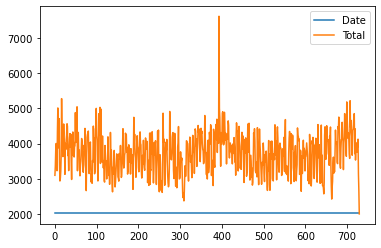

In [23]:
df.plot()

In [24]:


### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller



In [25]:
test_result=adfuller(df['Total'])

In [26]:
test_result

(-3.3617027403242377,
 0.012335798673572144,
 20,
 709,
 {'1%': -3.439606888036868,
  '5%': -2.865625121924057,
  '10%': -2.5689454046801052},
 19075.01611140476)

In [27]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(total):
    result=adfuller(total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [28]:
adfuller_test(df['Total'])

ADF Test Statistic : -3.3617027403242377
p-value : 0.012335798673572144
#Lags Used : 20
Number of Observations Used : 709
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Auto Regressive Model
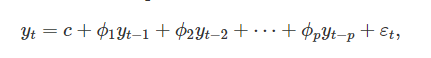

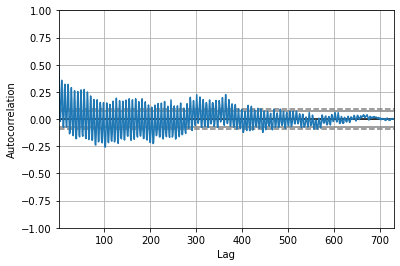

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Total'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [31]:
import statsmodels.api as sm

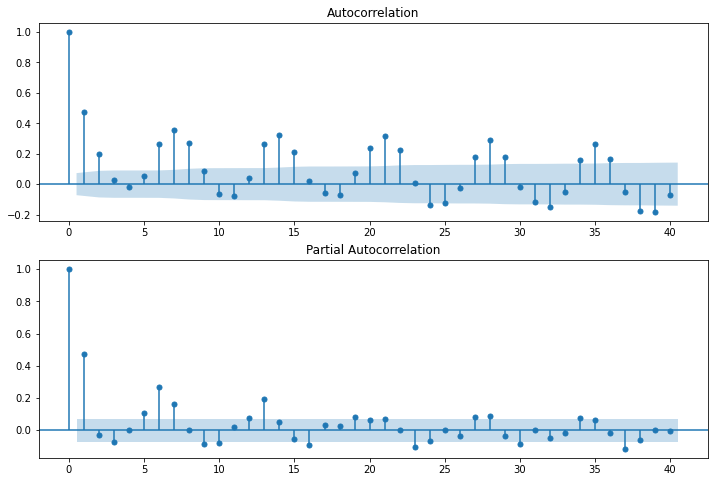

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Total'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Total'], lags=40, ax=ax2)

In [33]:
# To install the library
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [34]:
stepwise_fit = auto_arima(df['Total'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)  

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=20087.818, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=19825.578, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=20085.946, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=19964.907, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=19697.439, Time=1.33 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=19631.402, Time=2.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.17 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=19802.397, Time=1.53 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=19627.808, Time=2.36 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AI

In [35]:
# To print the summary
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  730
Model:             SARIMAX(3, 0, 0)x(2, 1, [1], 12)   Log Likelihood               -9802.473
Date:                              Sun, 24 Oct 2021   AIC                          19620.946
Time:                                      17:13:30   BIC                          19657.557
Sample:                                           0   HQIC                         19635.082
                                              - 730                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -969.8621   1902.494     -0.510      0.610   -4698.682    2758.958
ar.L1          0.4857      0.078      6.262      0.000       0.334       0.638
ar.L2          0.0678      0.086      0.788      0.431      -0.101       0.236
ar.L3          0.0283      0.081      0.347      0.728      -0.131       0.188
ar.S.L12      -0.1283      0.091     -1.412      0.158      -0.306       0.050
ar.S.L24      -0.2263      0.089     -2.530      0.011      -0.402      -0.051
ma.S.L12      -0.8853      0.055    -16.150      0.000      -0.993      -0.778
sigma2      6.708e+10      0.000   2.34e+14      0.000    6.71e+10    6.71e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               562.01
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.81
Prob(H) (two-sided):                  0.68   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.36e+29. Standard errors may be unstable.
"""

In [36]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Total'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Total   No. Observations:                  718
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -9686.776
Date:                            Sun, 24 Oct 2021   AIC                          19383.552
Time:                                    17:13:32   BIC                          19406.343
Sample:                                         0   HQIC                         19392.359
                                            - 718                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7326      0.066    -11.070      0.000      -0.862      -0.603
ar.S.L12      -0.2075      0.099     -2.086      0.037      -0.402      -0.013
ar.S.L24      -0.3522      0.105     -3.340      0.001      -0.559      -0.146
ma.S.L12      -0.8520      0.073    -11.687      0.000      -0.995      -0.709
sigma2      8.954e+10   4.33e-13   2.07e+23      0.000    8.95e+10    8.95e+10
===================================================================================
Ljung-Box (L1) (Q):                  21.75   Jarque-Bera (JB):               327.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.64
Prob(H) (two-sided):                  0.79   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+39. Standard errors may be unstable.
"""

<AxesSubplot:>

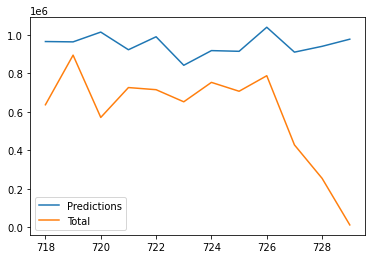

In [37]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Total'].plot(legend = True)

In [80]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test["Total"], predictions))
  
# Calculate mean squared error
print(mean_squared_error(test["Total"], predictions))

430729.9280706032
185528270935.707


<AxesSubplot:>

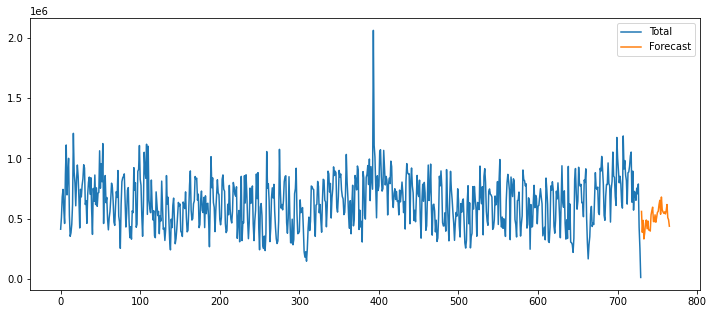

In [82]:
# Train the model on the full dataset
model = model = SARIMAX(df["Total"], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df["Total"].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)